In [1]:
import pandas as pd
import numpy as np
import math
from textblob import TextBlob as tb
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AYUSH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
march=pd.read_csv('MARCHFINALTWEET(RAW).csv')

In [3]:
march.shape

(3315, 9)

In [4]:
march=march.drop_duplicates(keep='first')

In [5]:
march.shape

(3313, 9)

In [6]:
march['language'].unique()

array(['ja', 'en', 'in', 'fr', 'und', 'mr', 'tl', 'hi', 'ar', 'th', 'nl',
       'cy', 'et', 'pt', 'es', 'vi', 'fa', 'bn', 'ta', 'ro', 'ur', 'tr',
       'kn', 'ca', 'km', 'zh', 'sd', 'de', 'it', 'gu', 'si', 'or', 'te',
       'lt', 'fi', 'no'], dtype=object)

In [41]:
lang=march['language'].value_counts().rename_axis('lang').reset_index(name='frequency')

In [42]:
lang

,lang,frequency
0,en,2452
1,hi,223
2,in,204
3,und,125
4,tl,54
5,mr,44
6,ar,39
7,ur,25
8,et,20
9,es,15


In [43]:
lang.shape

(36, 2)

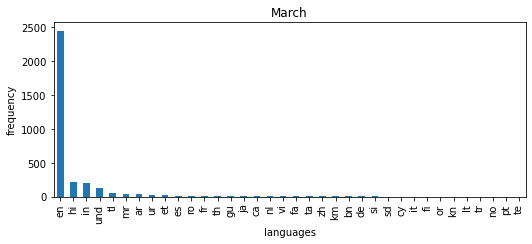

In [47]:
list1=np.array
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
list1=march['language'].value_counts().plot(ax=ax, kind='bar', xlabel='languages', ylabel='frequency')
plt.title("March")
plt.show()

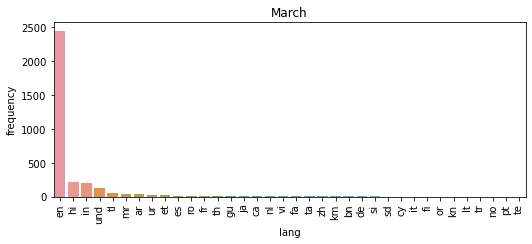

In [52]:
ax = sns.barplot(x="lang", y="frequency", data=lang)
plt.title("March")
plt.xticks(rotation=90)
plt.show()

In [21]:
for i in march['language']:
    index_names = march[march['language']!='en' ].index
    march.drop(index_names, inplace = True)

In [25]:
march.shape

(2452, 9)

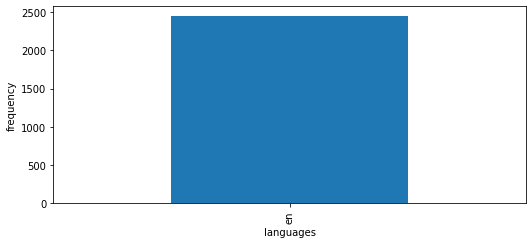

In [23]:
list1=np.array
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
list1=march['language'].value_counts().plot(ax=ax, kind='bar', xlabel='languages', ylabel='frequency')
plt.show()

In [13]:
duplicates = march[march.duplicated()]
duplicates.shape

(0, 9)

In [15]:
march.columns

Index(['Unnamed: 0', 'created_at', 'username', 'tweet', 'language',
       'replies_count', 'retweets_count', 'likes_count', 'Userhandle'],
      dtype='object')

In [16]:
march.drop(['Unnamed: 0', 'Userhandle'],axis=1,inplace=True)

In [17]:
march.columns

Index(['created_at', 'username', 'tweet', 'language', 'replies_count',
       'retweets_count', 'likes_count'],
      dtype='object')

In [18]:
march.shape

(2536, 7)

In [19]:
march[['replies_count','retweets_count', 'likes_count']]=march[['replies_count','retweets_count', 'likes_count']].fillna(0)

In [20]:
march.shape

(2536, 7)

In [21]:
march

,created_at,username,tweet,language,replies_count,retweets_count,likes_count
1,2021-03-03 04:56:36 India Standard Time,stevjacks,"Germany's Covid response ""was the envy of the ...",en,0.0,1.0,3.0
2,2021-03-03 04:47:18 India Standard Time,hen_cheng,Pfizer &amp; Moderna claim their vaccines very...,en,0.0,0.0,0.0
3,2021-03-03 04:04:54 India Standard Time,jozef101,We recently published the predictors of hospit...,en,2.0,4.0,7.0
5,2021-03-03 03:09:24 India Standard Time,lively_mohyo,@Alhamdhulillaah Them dey do Covid test 150AED...,en,0.0,0.0,0.0
6,2021-03-03 03:04:30 India Standard Time,akzureikat,@YMasannat @VGDakessian Time will tell! So far...,en,0.0,1.0,2.0
...,...,...,...,...,...,...,...
3416,2021-03-03T15:07:35.000Z,Mridul Sen,@CMOMaharashtra\n If you guys cannot control c...,en,0.0,0.0,0.0
3417,2021-03-20T05:16:18.000Z,Yoriichi Tsugikuni,@MamataOfficial\n \n@BanglarGorboMB\n \n@AITCo...,en,0.0,0.0,0.0
3418,2021-03-09T16:19:39.000Z,Amit Mukherjee,Replying to \n@RailwaySeva,en,0.0,0.0,0.0
3419,2021-03-14T03:07:58.000Z,Purushottam Prashar,@narendramodi\n \n@drharshvardhan\n Dear sir r...,en,1.0,1.0,1.0
